# **Customer_Churn_Prediction**

# ABOUT DATASET

**Context**


"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called  churn 


* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies  

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges 

* Demographic info about customers – gender, age range, and if they have partners and dependents

* **Churn** means wether the customer leave our service or not leave.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/archive (2).zip')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Customer ID is not important for our purpose.

df1 = df.drop('customerID' , axis='columns')
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Some things are not numerical converst them in numerical.eg. TotalCharges need to be numerical

In [ ]:
df1['TotalCharges'].values    # '346.45'  , it should be not in ''.

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**CONVERT TOTAL CHARGES INTO NUMERICAL FORM**

In [ ]:
df1.shape

(7043, 20)

In [ ]:
pd.to_numeric(df1['TotalCharges'] )

ValueError: ignored

Error because there are some places which are blank

**SHAPE OF DATA IN CASE TOTAL CHARGES WERE NULL OR BLANK**


In [ ]:
df1[pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()] # coerce means we are trying to ignore the errors. There are some places which are blank

In [ ]:
df1[pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()].shape                # There are very less places where values are null.So, we can remove them.

(11, 20)

**Convert total charges into numerical form ignoring the case of errors and leave them as null values**

In [ ]:
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()

**Drop the samples where total charges are null or blank**

In [ ]:
df2 = df1[~df1['TotalCharges'].isnull()]
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,False,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,False,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,False,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,False,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,False,Yes


In [ ]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges           bool
Churn                object
dtype: object

In [ ]:
df2[df2.Churn == 'No']    # Customers who did not left the company/service last month

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,False,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,False,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,False,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,False,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,False,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,False,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,False,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,False,No


#  **Data Visualisation:-**

* Data Visualisation is a the best tool through which we can understand the whole data . By just  looking at data it is not easy to understand what is going on. But if we can visualize it we can easily understand what is hide behind the data.

* Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.


In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


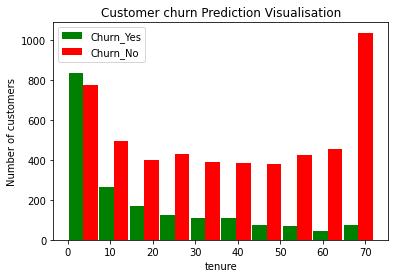

In [ ]:
# churn based on tenure


tenure_churn_no = df2[df2.Churn == 'No'].tenure      # Tenure (Period of stay in service) who did not left.
tenure_churn_yes = df2[df2.Churn == 'Yes'].tenure    #  Tenure (Period of stay in service) who  left.

plt.xlabel('tenure')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([tenure_churn_yes , tenure_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

* The customer having the large tenure are not leaving the serive . New customers are leaving more as compare to the customer who are old.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


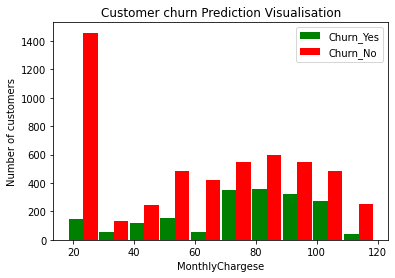

In [ ]:
# Churn based on monthly charges

mc_churn_no = df2[df2.Churn == 'No'].MonthlyCharges
mc_churn_yes = df2[df2.Churn == 'Yes'].MonthlyCharges   

plt.xlabel('MonthlyChargese')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([mc_churn_yes , mc_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

* If the monthly charges are less we are having less  customers leaving. The customers who are paying less monthly charges maybe taking less services so , they are leaving less as compare to those who pay more monthly charges.

**Print unique values in columns of type object : -**




In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,False,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,False,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,False,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,False,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,False,Yes


Now see what column is having how much category . Try to minimize the categories for eg :-In MultipleLines :  ['No phone service' 'No' 'Yes']
we are having three categories we can convert No phone service to No and then we left with two categories and then we can replace them by 1 or 0.


In [ ]:
df2['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
def print_unique_values(df):                                  
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} :  {df[column].unique()}')

In [ ]:
print_unique_values(df2)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


**CONVERT NO PHONE SERVICES OR NO INTERNET SERVICES INTO NO**

In [ ]:
df2 = df2.replace('No phone service' , 'No')
df2 = df2.replace('No internet service' , 'No')

In [ ]:
print_unique_values(df2)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


**Convert Yes and No into 1 or 0**

In [ ]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' ,
                  'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' ,
                  'Churn']

for col in yes_no_columns:
  df2[col].replace({'Yes':1 , 'No':0} , inplace=True)     # inplace will update actual data 

In [ ]:


df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,False,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,False,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,False,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,False,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,False,1


In [ ]:
for col in df2:
  print(col , ':' , df2[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [False  True]
Churn : [0 1]


**Now work on gender column** 

In [ ]:
df2['gender'].replace({'Female':1 ,  'Male':0} , inplace=True)

In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,False,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,False,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,False,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,False,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,False,1


'**Now work on InternetService , Contract ,Payment Method**

In [ ]:
df3 = pd.get_dummies(data = df2 , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])  # Use dummy because now we have more categories.
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                  bool
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# **Prepare a model that can predict churn**



**Separate features and labels ino x and y**

In [ ]:
X = df3.drop('Churn' , axis='columns')
Y = df3['Churn']

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0,train_size=0.8)

**Logistic Regression Model**

In [ ]:

from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

lmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print('Training Accuarcy',lmodel.score(xtrain,ytrain))
print('Testing Accuarcy',lmodel.score(xtest,ytest))

Training Accuarcy 0.8052893148739794
Testing Accuarcy 0.7970191625266146


Text(69.0, 0.5, 'Truth')

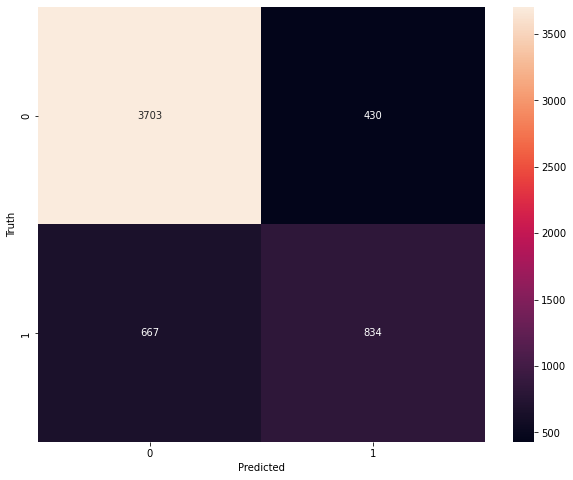

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , lmodel.predict(xtrain))
cm_test = confusion_matrix(ytest , lmodel.predict(xtest))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

* Model is more accurate towards 0 cases

Text(69.0, 0.5, 'Truth')

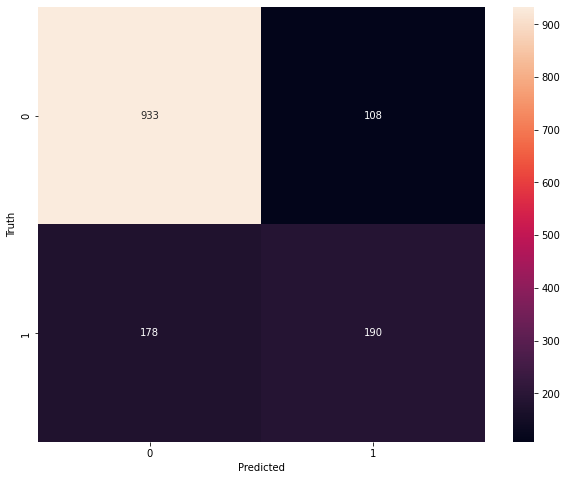

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Find out approx value for area under curve.

In [ ]:
ytrain_pred_prob = lmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = lmodel.predict_proba(xtest)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8510326126642243
0.8245912166395188


In [ ]:
fpr,tpr,thresh = roc_curve(ytrain,ytrain_pred_prob)

In [ ]:
import numpy as np

g_val = tpr * (1-fpr)
idx = np.argmax(g_val)
print(idx)

916


In [ ]:
thresh[idx]   # way lower than 0.5

0.2931599455740613

In [ ]:
print(fpr[idx] , tpr[idx])

0.23058311154125333 0.770819453697535


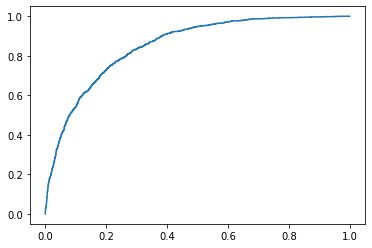

In [ ]:
plt.plot(fpr,tpr)
plt.show()

In [ ]:
# Evaluate the model performance for threshold 0.29

In [ ]:
train_prediction = np.where(lmodel.predict_proba(xtrain)[:,1] >= 0.2931599455740613 , 1 , 0)
test_prediction = np.where(lmodel.predict_proba(xtest)[:,1] >= 0.2931599455740613 , 1 , 0)

In [ ]:
(ytrain == train_prediction).sum() / len(xtrain)

0.7697905573304934

In [ ]:
(ytest == test_prediction).sum() / len(xtest)

0.7530163236337828

Text(69.0, 0.5, 'Truth')

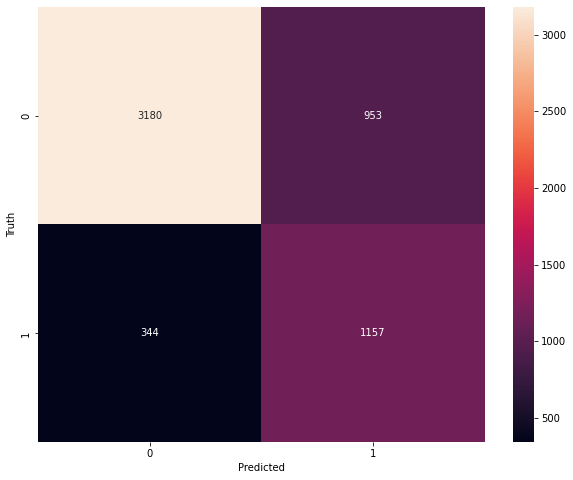

In [ ]:

cm_train = confusion_matrix(ytrain , train_prediction)
cm_test = confusion_matrix(ytest , test_prediction)

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
3180/(3180+953)

0.7694168884587467

In [ ]:
1157/(1157+344)

0.770819453697535

* Accuracy came down from previous model but still this model is good because  this model is less bias model.

Text(69.0, 0.5, 'Truth')

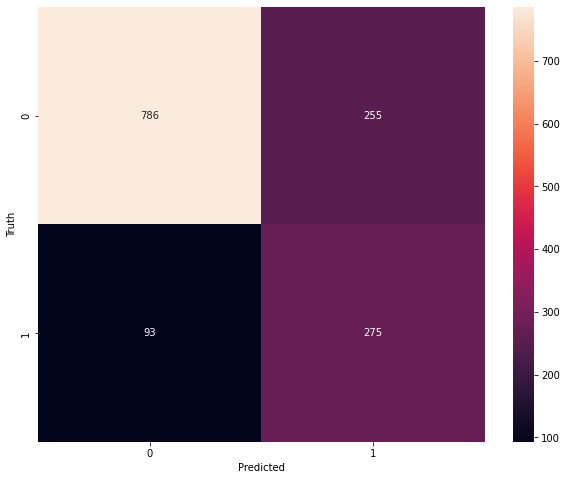

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
786/(93+255)

2.2586206896551726

In [ ]:
275/(255+93)

0.7902298850574713

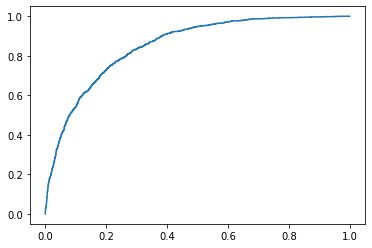

In [ ]:

plt.plot(fpr, tpr)
plt.show()

In [ ]:
lmodel.predict_proba(xtrain)[:,1]

array([0.00850301, 0.69141659, 0.00602336, ..., 0.00815475, 0.74065631,
       0.12703671])

**Support Vector Machine model**

* https://scikit-learn.org/stable/modules/svm.html


In [ ]:
from sklearn.svm import SVC
smodel = SVC(probability=True)

smodel.fit(xtrain,ytrain)

SVC(probability=True)

In [ ]:

print(smodel.score(xtrain,ytrain))
print(smodel.score(xtest,ytest))

0.791089811856585
0.7806955287437899


In [ ]:

ytrain_pred_prob = smodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = smodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.7993832807324353
0.7592863780645701


In [ ]:
fpr_s,tpr_s,thresh_s = roc_curve(ytrain,ytrain_pred_prob)

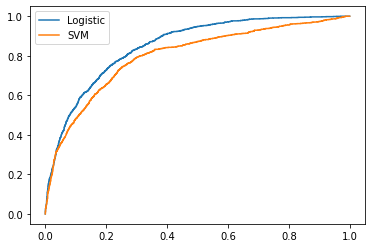

In [ ]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.legend()

plt.show()

* Logistic is slightly better than SVM

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=6)

rmodel.fit(xtrain,ytrain)

print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

0.8138090166844161
0.7920511000709723


In [ ]:
ytrain_pred_prob = rmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = rmodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8710319420894176
0.8277967464394604


In [ ]:
fpr_r,tpr_r,thresh_r = roc_curve(ytrain,ytrain_pred_prob)

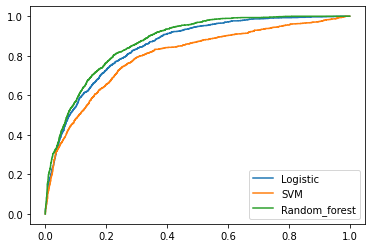

In [ ]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.plot(fpr_r , tpr_r , label = 'Random_forest')

plt.legend()

plt.show()

* Hence , random forest is giving more better results from all there things that we have used.

**Neural Network Model:-**

In [ ]:
import numpy as np

In [ ]:
xtrain.shape[1]

26

In [ ]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2920,1,0,1,0,72,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
2966,1,1,0,0,14,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6099,1,0,1,1,71,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5482,0,0,1,1,33,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2012,1,0,1,0,47,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
col_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
saclar = MinMaxScaler()

xtrain[col_scale] = scaler.fit_transform(xtrain[col_scale])
xtest[col_scale] = scaler.fit_transform(xtest[col_scale])

NameError: ignored

In [ ]:
ytrain.shape

(5634,)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()                              
model.add(layers.Dense(16 , activation = 'relu' , input_dim = xtrain.shape[1]))              
model.add(layers.Dense(1 , activation = 'sigmoid'))     # It will transform any value in the range from 0 to 1                           
                           

In [ ]:
# Activation Function :-https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                432       
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
from keras import metrics

model.compile(optimizer = 'sgd',
              loss = 'mse' ,                    # error will be calculated by mse
              metrics = ['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=10)

ValueError: ignored

In [ ]:
model.evaluate(xtest,ytest)

**Project to submit:-**


1.   House Price Prediction 
2.   Customer churn Prediction
3.   Handwritten Digit Recognition

